In [28]:
import sys
sys.path.append("..")
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from LowLevelModules.GeneralFunctions import prettify_plot
from LowLevelModules.XPScontroller import XPSstage
from LowLevelModules.LakeShore import GaussMeter475

ip_address = '169.254.66.147'
portnum = 5001
groupnum = 2    #magnet stage
magnet = XPSstage(ip_address, portnum, groupnum)

GM = GaussMeter475('GPIB0::13::INSTR')
#GM.zero_probe()

# Calibrate magnetic field VS magnet position

<IPython.core.display.Javascript object>


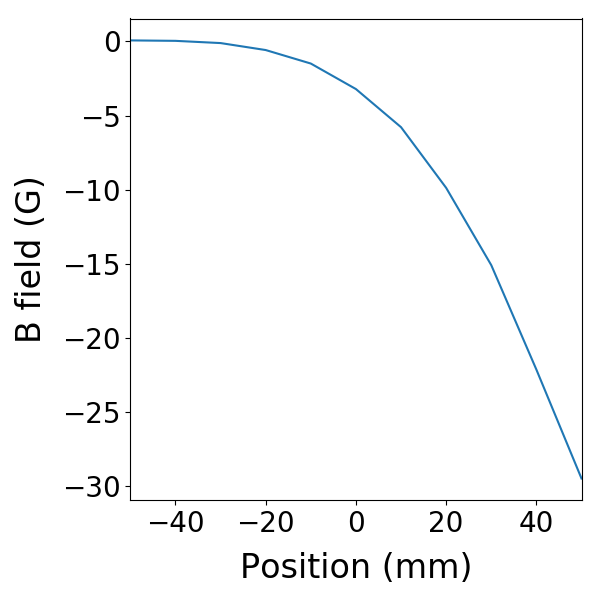

In [33]:
import time
magnet.move_to(-50)
time.sleep(5)
fig= plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

magnet_pos = np.arange(-50, 51, 10)
field = np.zeros(len(magnet_pos))

for i, pos in enumerate(magnet_pos):
    magnet.move_to(pos)
    time.sleep(1)
    field[i] = GM.get_field() 

ax.plot(magnet_pos, field)
prettify_plot(ax, "Position (mm)", "B field (G)")
ax.set_xlim([np.min(magnet_pos), np.max(magnet_pos)])
plt.tight_layout()